<a href="https://colab.research.google.com/github/jscortesg/Uniandes-MetodosComputacionales-2022-01/blob/main/DS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gráfica de KNN (K vecinos más cercanos)

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [ ]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [ ]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

iris_dataframe.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
5,5.0,3.5,1.6,0.6
6,5.4,3.7,1.5,0.2
7,5.0,2.0,3.5,1.0
8,6.5,3.0,5.5,1.8
9,6.7,3.3,5.7,2.5


In [ ]:
iris_dataframe.shape

(112, 4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn.predict(X_new)
prediction

array([0])

In [ ]:
print("Objetivo predicho: {}".format(iris_dataset['target_names'][prediction]))

Objetivo predicho: ['setosa']


In [ ]:
print("Score de X_test: {:.2f}".format(knn.score(X_test, y_test)))

Score de X_test: 0.97


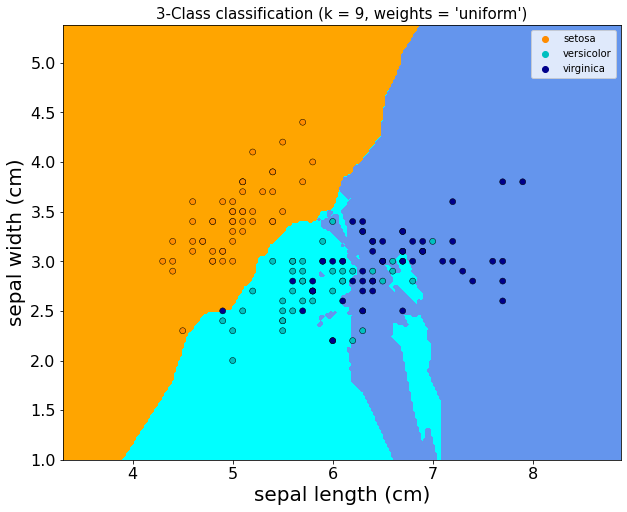

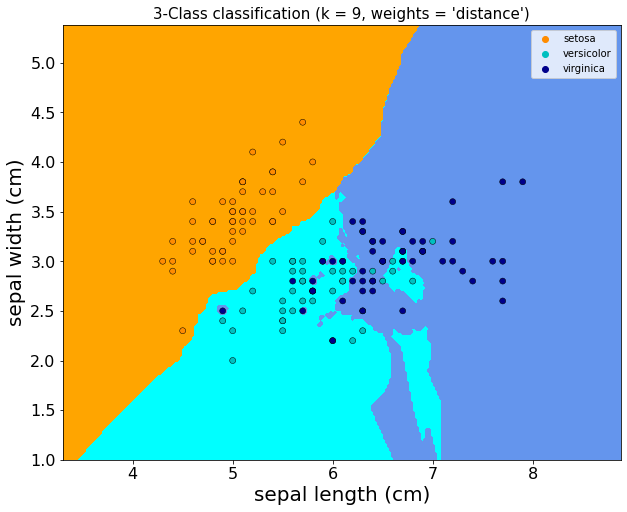

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets #neighbors, 

n_neighbors = 9

# import some data to play with
#iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris_dataset["data"][:, :2]
y = iris_dataset["target"]

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights) #neighbors.
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris_dataset.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights), fontsize=15
    )
    plt.xlabel(iris_dataset.feature_names[0], fontsize=20)
    plt.ylabel(iris_dataset.feature_names[1], fontsize=20)
    plt.rc('xtick', labelsize=16) 
    plt.rc('ytick', labelsize=16) 

plt.show()

Tomado de https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=439b318713e60b042f0734b5547b92b9e3a7e0aea13cec45db58db0ff0e1192a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


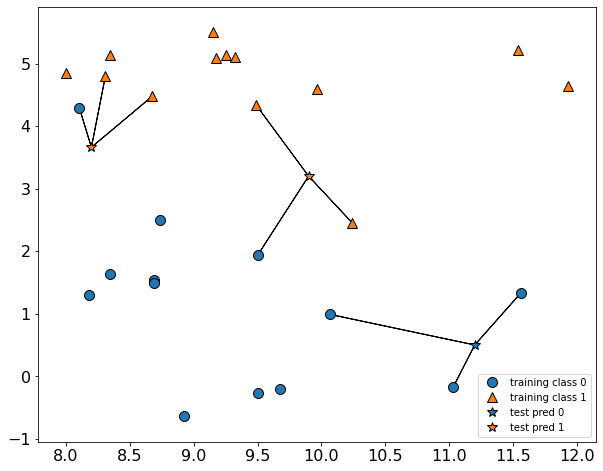

In [ ]:
plt.figure(figsize=(10, 8))
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

#Sensibilidad de KNN según N° de vecinos

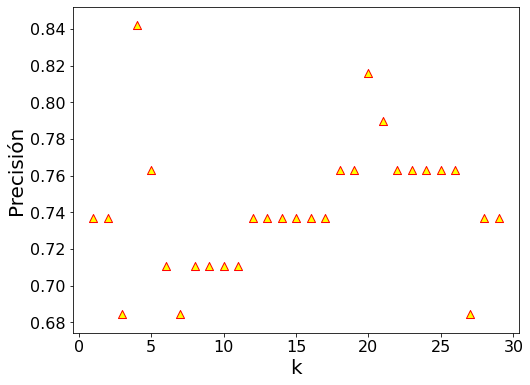

In [ ]:
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train[:, :2], y_train)
    scores.append(knn.score(X_test[:, :2], y_test))

plt.figure(figsize=(8, 6))
plt.xlabel('k', fontsize=20)
plt.ylabel('Precisión', fontsize=20)
plt.ylim(min(scores)-0.01,max(scores)+0.01)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.scatter(k_range, scores,  c ="yellow", marker ="^", edgecolor ="red", s = 65)

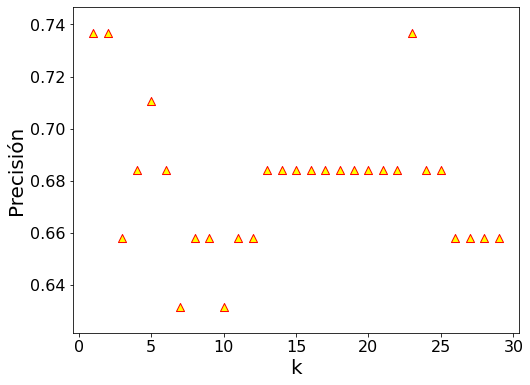

In [ ]:
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
    knn.fit(X_train[:, :2], y_train)
    scores.append(knn.score(X_test[:, :2], y_test))

plt.figure(figsize=(8, 6))
plt.xlabel('k', fontsize=20)
plt.ylabel('Precisión', fontsize=20)
plt.ylim(min(scores)-0.01,max(scores)+0.01)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.scatter(k_range, scores,  c ="yellow", marker ="^", edgecolor ="red", s = 65)

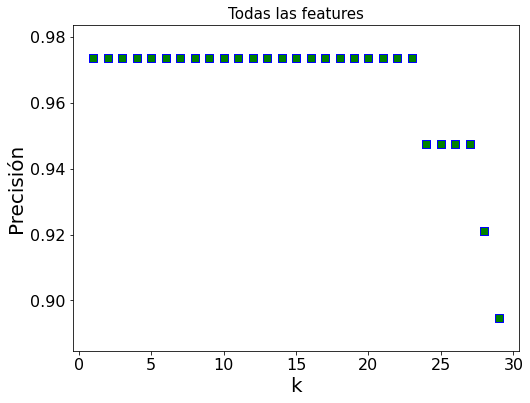

In [ ]:
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.xlabel('k')
plt.ylabel('Precisión')
plt.title('Todas las features', fontsize=15)
plt.xlabel('k', fontsize=20)
plt.ylabel('Precisión', fontsize=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.ylim(min(scores)-0.01,max(scores)+0.01)
plt.scatter(k_range, scores,  c ="green", marker ="s", edgecolor ="blue", s = 65)

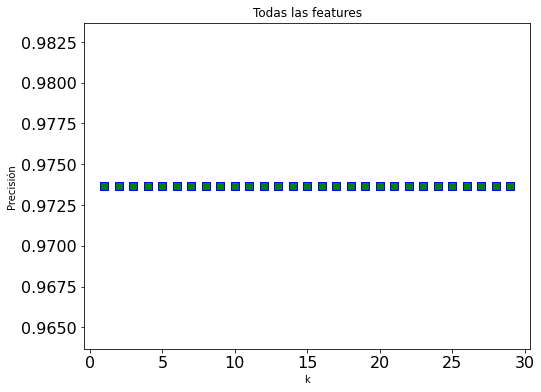

In [ ]:
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.xlabel('k')
plt.ylabel('Precisión')
plt.title('Todas las features')
plt.ylim(min(scores)-0.01,max(scores)+0.01)
plt.scatter(k_range, scores,  c ="green", marker ="s", edgecolor ="blue", s = 65)

#Sensibilidad KNN según proporción train/test

Text(0, 0.5, 'Precisión')

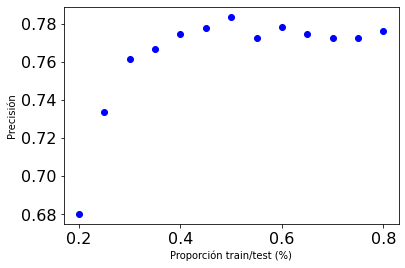

In [ ]:
t = np.arange(0.2, 0.85, 0.05)

knn = KNeighborsClassifier(n_neighbors = 15, weights='uniform')

plt.figure()

for s in t:

    scores = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train[:, :2], y_train)
        scores.append(knn.score(X_test[:, :2], y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Proporción train/test (%)')
plt.ylabel('Precisión')

Text(0, 0.5, 'Precisión')

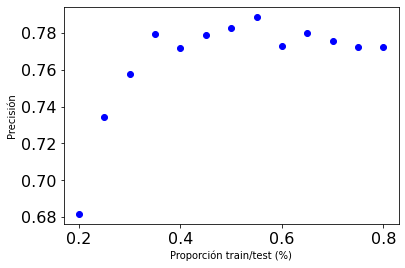

In [ ]:
t = np.arange(0.2, 0.85, 0.05)

knn = KNeighborsClassifier(n_neighbors = 15, weights='uniform')

plt.figure()

for s in t:

    scores = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Proporción train/test (%)')
plt.ylabel('Precisión')

#Regresión por KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)

In [ ]:
df = pd.DataFrame(X_train1, y_train1)

df.head(10)

,0
0.697986,0.085407
1.876649,1.850384
-1.415024,-2.413967
0.779321,1.391964
0.093989,-0.359085
0.035279,0.645269
0.868933,2.793792
0.084485,-1.174547
0.094526,-1.172317
1.000324,0.606690


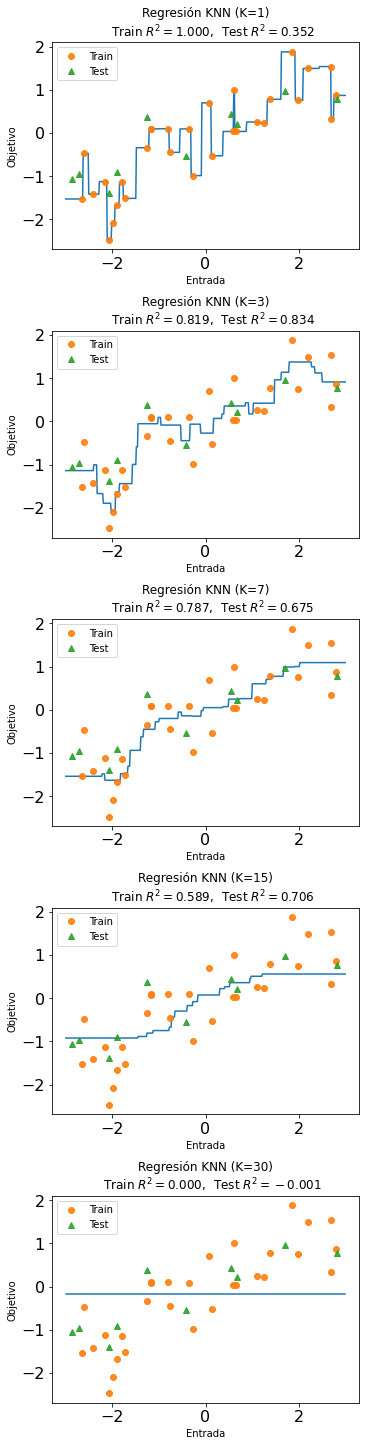

In [ ]:
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 30]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train1, y_train1)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train1, y_train1)
    test_score = knnreg.score(X_test1, y_test1)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train1, y_train1, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test1, y_test1, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Entrada')
    thisaxis.set_ylabel('Objetivo')
    thisaxis.set_title('Regresión KNN (K={})\n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


#Generalización, *Underfitting* y *Overfitting*

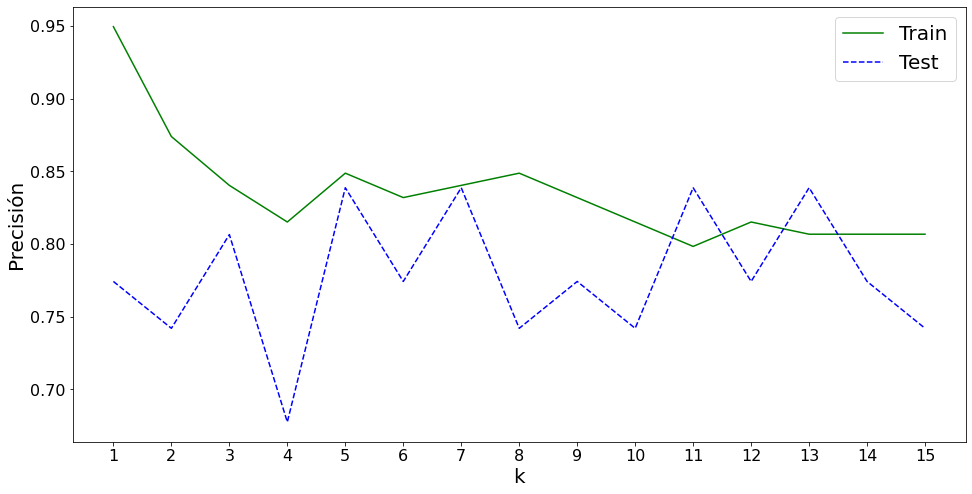

In [ ]:
k_range = range(1,16)
scores1 = []
scores2 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores1.append(knn.score(X_train, y_train))
    scores2.append(knn.score(X_test, y_test))

R_resta = []

for x, y in zip(scores1,scores2):
  R_resta.append(abs(x-y))


#R_restamin = R_resta.index(min(R_resta))


plt.figure(figsize=(16, 8))
plt.xlabel('k', fontsize=20)
plt.ylabel('Precisión', fontsize=20)
plt.plot(k_range, scores1,  c ="green", label='Train')
plt.plot(k_range, scores2,  'b--', label='Test')
#plt.axvline(x = R_restamin, color='black', label='Mínimo Train$-$Test')
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('legend', fontsize=20)
plt.xticks(k_range)
plt.legend(loc='upper right')

In [ ]:
min(R_resta)

0.0016264570344266538

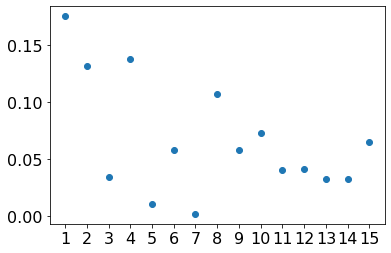

In [ ]:
plt.figure()
plt.xticks(np.arange(1, 16))
plt.scatter(range(1,16), R_resta)

#Regresión Lineal

Regresión lineal simple:

\begin{equation}
\hat{y} = w[0]*x[0] + b
\end{equation}

$x[0]$: feature. $\hat{y}$: predicción.

Regresión lineal múltiple ($p$ variables independientes):

\begin{align}
\hat{y} = &\sum_{k=0}^{p}w[k]*x[k] + b \\
&=w[0]*x[0] + w[1]*x[1] + \cdots + w[p]*x[p] + b
\end{align}

O también, tomando $\vec{w} = (w[0], w[1], \cdots, w[p])$ y $\vec{x} = (x[0], x[1], \cdots, x[p])$,

\begin{equation}
\hat{y} = \vec{w}\cdot\vec{x} + b
\end{equation}

w[0]: 0.393906  b: -0.031804


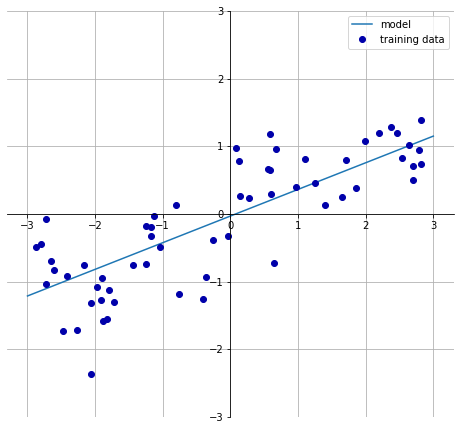

In [ ]:
import mglearn

mglearn.plots.plot_linear_regression_wave()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train2, y_train2)

print("Pendiente: {}".format(lr.coef_))
print("Intercepto: {}".format(lr.intercept_))

Pendiente: [0.39390555]
Intercepto: -0.031804343026759746


In [ ]:
#Entrenamiento y testeo -R cuadrado-
#Underfitting

print("R cuadrado entrenamiento: {:.3f}".format(lr.score(X_train2, y_train2)))
print("R cuadrado testeo: {:.3f}".format(lr.score(X_test2, y_test2)))

R cuadrado entrenamiento: 0.670
R cuadrado testeo: 0.659


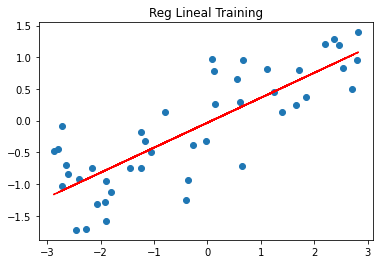

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train2, y_train2)
plt.title("Reg Lineal Training")
plt.plot(X_train2, lr.coef_*X_train2 + lr.intercept_, 'r--')

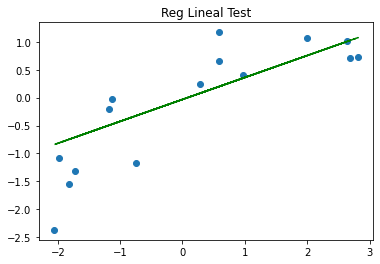

In [ ]:
plt.figure()
plt.scatter(X_test2, y_test2)
plt.title("Reg Lineal Test")
plt.plot(X_test2, lr.coef_*X_test2 + lr.intercept_, 'g--')

#Regresiones lineales con penalización

Regresión Ridge:



*   Modelos con múltiples features
*   *Reg lineal múltiple*

**Minimización distancia L2**

Mínimos cuadrados estándar:

\begin{equation}
RSS = \sum_{i=1}^{N}[\hat{y}_{i} - (\vec{w}\cdot\vec{x}_{i} + b)]^{2}
\end{equation}

Mínimos cuadrados + Ridge:

\begin{equation}
RSS_{\text{Ridge}} = \sum_{i=1}^{N}[\hat{y}_{i} - (\vec{w}\cdot\vec{x}_{i} + b)]^{2} + \alpha\sum_{j=1}^{p}w_{j}^{2}
\end{equation}

**Minimización distancia L1**

Mínimos cuadrados + Lasso:

\begin{equation}
RSS_{\text{Lasso}} = \sum_{i=1}^{N}[\hat{y}_{i} - (\vec{w}\cdot\vec{x}_{i} + b)^{2}] + \alpha\sum_{j=1}^{p}|w_{j}|
\end{equation}


In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
housing['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
housing['target_names']

['MedHouseVal']

In [ ]:
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
housing['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(housing['data'], housing['target'], random_state = 0)

In [ ]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [ ]:
import pandas as pd

housing_dataframe = pd.DataFrame(X_train3, columns = housing.feature_names)

housing_dataframe.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,7.3003,19.0,7.961600,1.137600,1926.0,3.081600,38.46,-122.68
1,5.9547,18.0,6.547325,1.102881,547.0,2.251029,32.95,-117.24
2,3.2125,19.0,5.207547,1.216981,314.0,2.962264,34.68,-118.27
3,6.9930,13.0,6.428571,1.000000,120.0,2.857143,33.51,-117.18
4,2.5162,21.0,4.429348,1.036685,1735.0,2.357337,38.62,-121.41
5,6.4385,24.0,5.693727,0.948339,824.0,3.040590,34.04,-118.09
6,4.0139,26.0,5.779152,1.051237,2259.0,3.991166,34.09,-117.62
7,4.5420,12.0,5.781069,1.068597,10475.0,2.332962,34.40,-118.46
8,1.9476,14.0,5.323741,1.079137,1171.0,1.684892,33.73,-117.02
9,3.5104,30.0,3.376694,1.010840,1990.0,5.392954,34.26,-118.43


In [ ]:
housing_dataframe.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.121218,0.318344,-0.060920,0.007218,0.001713,-0.085855,-0.010443
HouseAge,-0.121218,1.000000,-0.145134,-0.069198,-0.298695,0.012809,0.017404,-0.113763
AveRooms,0.318344,-0.145134,1.000000,0.855203,-0.067163,0.003653,0.097989,-0.021817
AveBedrms,-0.060920,-0.069198,0.855203,1.000000,-0.060250,-0.003184,0.065765,0.013538
Population,0.007218,-0.298695,-0.067163,-0.060250,1.000000,0.073333,-0.116536,0.106268
AveOccup,0.001713,0.012809,0.003653,-0.003184,0.073333,1.000000,-0.004018,0.013045
Latitude,-0.085855,0.017404,0.097989,0.065765,-0.116536,-0.004018,1.000000,-0.925081
Longitude,-0.010443,-0.113763,-0.021817,0.013538,0.106268,0.013045,-0.925081,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression().fit(X_train3, y_train3)

print("Pendiente: {}".format(lrm.coef_))
print("Intercepto: {}".format(lrm.intercept_))

Pendiente: [ 4.39091042e-01  9.59864665e-03 -1.03311173e-01  6.16730152e-01
 -7.63275197e-06 -4.48838256e-03 -4.17353284e-01 -4.30614462e-01]
Intercepto: -36.60959377871435


In [ ]:
print("R cuadrado entrenamiento Reg múltiple: {:.3f}".format(lrm.score(X_train3, y_train3)))
print("R cuadrado testeo Reg múltiple: {:.3f}".format(lrm.score(X_test3, y_test3)))

R cuadrado entrenamiento Reg múltiple: 0.611
R cuadrado testeo Reg múltiple: 0.591


In [ ]:
from sklearn.linear_model import Ridge

ridge1 = Ridge(0.01).fit(X_train3, y_train3)


In [ ]:
ridge1.coef_

array([ 4.39089785e-01,  9.59866882e-03, -1.03308774e-01,  6.16717651e-01,
       -7.63265373e-06, -4.48839117e-03, -4.17353077e-01, -4.30614084e-01])

In [ ]:
ridge1.intercept_

-36.6095511004157

In [ ]:
ridge1.score(X_train3, y_train3)

0.6109633715415762

In [ ]:
print("Efecto de regresión Ridge:")
for this_alpha in [0, 0.01, 0.1, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train3, y_train3)
    r2_train = linridge.score(X_train3, y_train3)
    r2_test = linridge.score(X_test3, y_test3)
    print('Alfa = {:.2f}\n \
r-2 entrenamiento: {:.3f}, r-2 testeo: {:.3f}\n'
         .format(this_alpha, r2_train, r2_test))

Efecto de regresión Ridge:
Alfa = 0.00
 r-2 entrenamiento: 0.611, r-2 testeo: 0.591

Alfa = 0.01
 r-2 entrenamiento: 0.611, r-2 testeo: 0.591

Alfa = 0.10
 r-2 entrenamiento: 0.611, r-2 testeo: 0.591

Alfa = 1.00
 r-2 entrenamiento: 0.611, r-2 testeo: 0.591

Alfa = 10.00
 r-2 entrenamiento: 0.611, r-2 testeo: 0.591

Alfa = 20.00
 r-2 entrenamiento: 0.611, r-2 testeo: 0.591

Alfa = 50.00
 r-2 entrenamiento: 0.611, r-2 testeo: 0.591

Alfa = 100.00
 r-2 entrenamiento: 0.611, r-2 testeo: 0.590

Alfa = 1000.00
 r-2 entrenamiento: 0.604, r-2 testeo: 0.581



In [ ]:
from sklearn.linear_model import Lasso

print("Efecto de regresión Lasso:")
for this_alpha in [0, 0.01, 0.1, 1, 2, 5]:
    linlasso = Lasso(alpha = this_alpha).fit(X_train3, y_train3)
    r2_train = linlasso.score(X_train3, y_train3)
    r2_test = linlasso.score(X_test3, y_test3)
    print('Alfa = {:.3f}\n \
r-2 entrenamiento: {:.3f}, r-2 testeo: {:.3f}\n'
         .format(this_alpha, r2_train, r2_test))

Efecto de regresión Lasso:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Alfa = 0.000
 r-2 entrenamiento: 0.611, r-2 testeo: 0.591

Alfa = 0.010
 r-2 entrenamiento: 0.607, r-2 testeo: 0.586

Alfa = 0.100
 r-2 entrenamiento: 0.550, r-2 testeo: 0.526

Alfa = 1.000
 r-2 entrenamiento: 0.292, r-2 testeo: 0.285

Alfa = 2.000
 r-2 entrenamiento: 0.001, r-2 testeo: 0.000

Alfa = 5.000
 r-2 entrenamiento: 0.001, r-2 testeo: 0.000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.019e+03, tolerance: 2.066e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
lrmb = LinearRegression().fit(X_train3[:,[0,1,2]], y_train3)

print("Pendiente: {}".format(lrmb.coef_))
print("Intercepto: {}".format(lrmb.intercept_))

print("R cuadrado entrenamiento Reg múltiple: {:.3f}".format(lrmb.score(X_train3[:,[0,1,2]], y_train3)))
print("R cuadrado testeo Reg múltiple: {:.3f}".format(lrmb.score(X_test3[:,[0,1,2]], y_test3)))

Pendiente: [ 0.44673916  0.01712823 -0.02395266]
Intercepto: -0.01682672113378869
R cuadrado entrenamiento Reg múltiple: 0.520
R cuadrado testeo Reg múltiple: 0.489


In [ ]:
lrmb2 = LinearRegression().fit(X_train3[:,[0,1]], y_train3)

print("Pendiente: {}".format(lrmb2.coef_))
print("Intercepto: {}".format(lrmb2.intercept_))

print("R cuadrado entrenamiento Reg múltiple: {:.3f}".format(lrmb2.score(X_train3[:,[0,1]], y_train3)))
print("R cuadrado testeo Reg múltiple: {:.3f}".format(lrmb2.score(X_test3[:,[0,1]], y_test3)))

Pendiente: [0.43696192 0.01764907]
Intercepto: -0.12397802103195188
R cuadrado entrenamiento Reg múltiple: 0.517
R cuadrado testeo Reg múltiple: 0.484


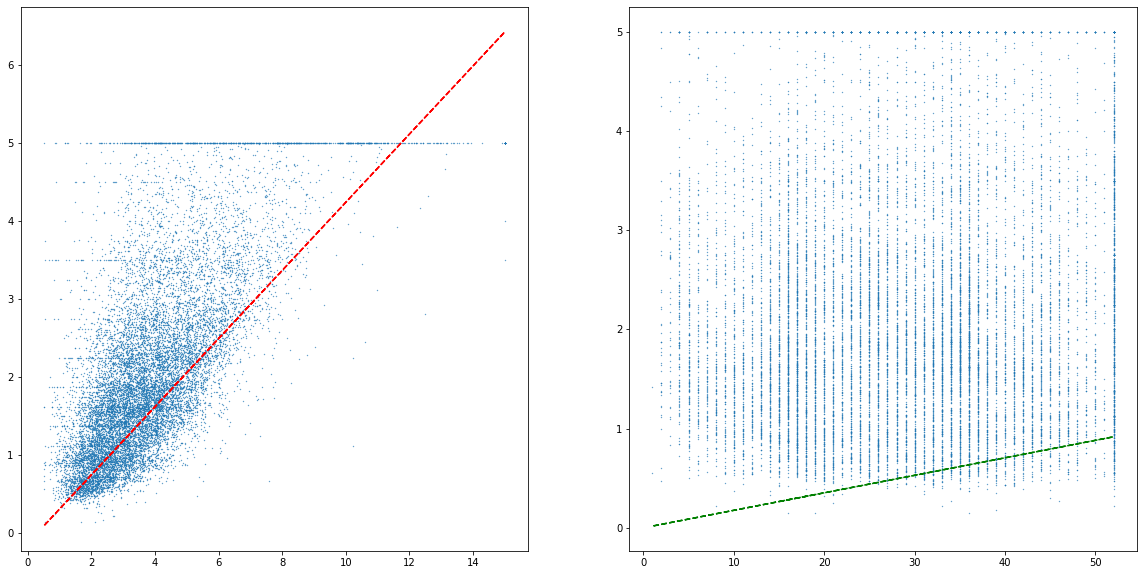

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(X_train3[:,0], lrmb2.coef_[0]*X_train3[:,0] + lrmb2.intercept_, 'r--')
axes[0].scatter(X_train3[:,0], y_train3, s = 0.1)
axes[1].plot(X_train3[:,1], lrmb2.coef_[1]*X_train3[:,1], 'g--')
axes[1].scatter(X_train3[:,1], y_train3, s = 0.1)

In [ ]:
lrmb3 = LinearRegression().fit(X_train3[:,[0,2]], y_train3)

print("Pendiente: {}".format(lrmb3.coef_))
print("Intercepto: {}".format(lrmb3.intercept_))

print("R cuadrado entrenamiento Reg múltiple: {:.3f}".format(lrmb3.score(X_train3[:,[0,2]], y_train3)))
print("R cuadrado testeo Reg múltiple: {:.3f}".format(lrmb3.score(X_test3[:,[0,2]], y_test3)))

Pendiente: [ 0.43723082 -0.03405121]
Intercepto: 0.5652438200089327
R cuadrado entrenamiento Reg múltiple: 0.486
R cuadrado testeo Reg múltiple: 0.460


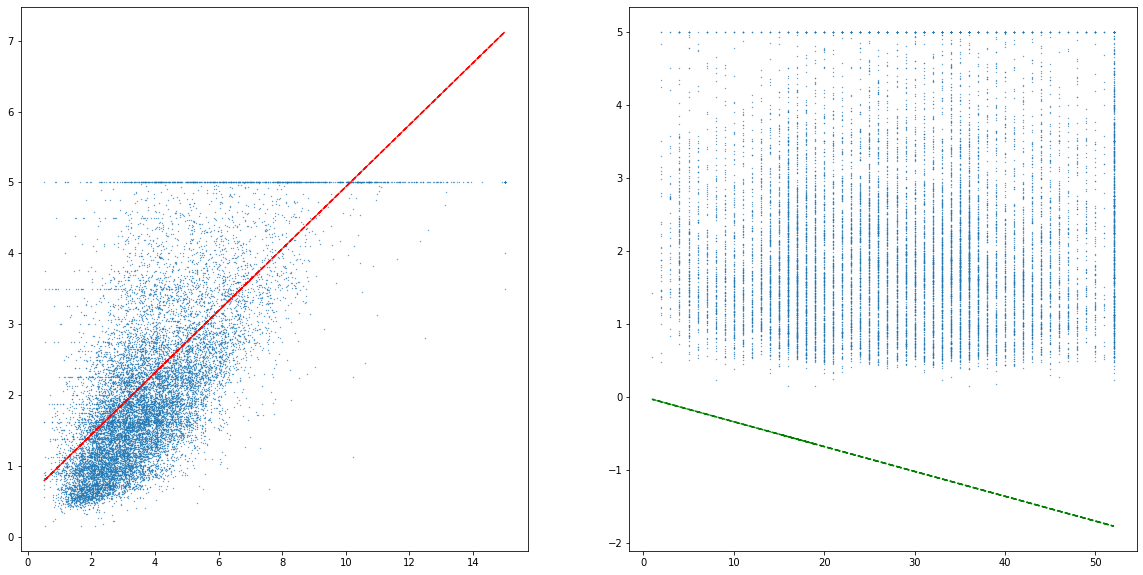

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(X_train3[:,0], lrmb3.coef_[0]*X_train3[:,0] + lrmb3.intercept_, 'r--')
axes[0].scatter(X_train3[:,0], y_train3, s = 0.1)
axes[1].plot(X_train3[:,1], lrmb3.coef_[1]*X_train3[:,1], 'g--')
axes[1].scatter(X_train3[:,1], y_train3, s = 0.1)

#Regresión Polinómica

Dos características/features:

\begin{equation}
\vec{x} = (x_{0},x_{1})
\end{equation}

Polinomio de grado 2:

\begin{equation}
\vec{x}' = (x_{0}, x_{1}, x_{0}^{2}, x_{0}x_{1}, x_{1}^{2})
\end{equation}

Regresión polinómica de grado 2:

\begin{equation}
\hat{y} = \hat{w}_{0}x_{0} + \hat{w}_{1}x_{1} + \hat{w}_{00}x_{0}^{2} + \hat{w}_{01}x_{0}x_{1} + \hat{w}_{11}x_{1}^{2} + b.
\end{equation}

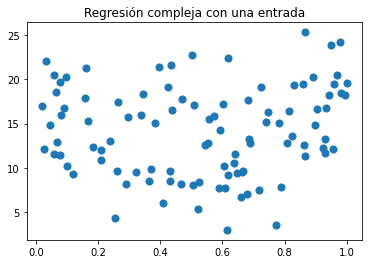

In [ ]:
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Regresión compleja con una entrada')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

In [ ]:
X_F1.shape

(100, 7)

In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_F1, y_F1,
                                                   random_state = 0)

In [ ]:
print("Regresión lineal múltiple")

linregf1 = LinearRegression().fit(X_train5, y_train5)

print('Coeficientes: {}'
     .format(linregf1.coef_))
print('Corte en y: {:.3f}'
     .format(linregf1.intercept_))
print('R-2 (entrenamiento): {:.3f}'
     .format(linregf1.score(X_train5, y_train5)))
print('R-2 (testeo): {:.3f}'
     .format(linregf1.score(X_test5, y_test5)))

Regresión lineal múltiple
Coeficientes: [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
Corte en y: 1.543
R-2 (entrenamiento): 0.722
R-2 (testeo): 0.722


In [ ]:
X_train5df = pd.DataFrame(X_train5)

In [ ]:
X_train5df.head(10)

,0,1,2,3,4,5,6
0,0.259423,0.373813,0.587600,0.272822,0.370853,0.197054,0.459856
1,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428
2,0.404244,0.524184,0.365100,0.190567,0.019123,0.518150,0.842777
3,0.952143,0.300029,0.160468,0.886305,0.446394,0.907876,0.160230
4,0.622231,0.279068,0.209750,0.115703,0.577140,0.695270,0.671957
5,0.974256,0.990345,0.409054,0.162954,0.638762,0.490305,0.989410
6,0.618826,0.133461,0.980580,0.871786,0.502721,0.922348,0.541381
7,0.062636,0.241902,0.432281,0.521996,0.773084,0.958741,0.117320
8,0.699575,0.967966,0.994401,0.451822,0.070870,0.292794,0.152355
9,0.128861,0.392676,0.956406,0.187131,0.903984,0.543806,0.456911


In [ ]:
X_train5df.corr()

,0,1,2,3,4,5,6
0,1.000000,0.061561,0.195554,0.177503,-0.009466,-0.066517,0.035785
1,0.061561,1.000000,0.041317,0.071555,-0.087120,-0.271737,0.169190
2,0.195554,0.041317,1.000000,-0.032950,0.127643,-0.115241,-0.136186
3,0.177503,0.071555,-0.032950,1.000000,-0.052130,0.026491,-0.239910
4,-0.009466,-0.087120,0.127643,-0.052130,1.000000,0.286641,0.100048
5,-0.066517,-0.271737,-0.115241,0.026491,0.286641,1.000000,-0.101617
6,0.035785,0.169190,-0.136186,-0.239910,0.100048,-0.101617,1.000000


In [ ]:
print("Efecto de regresión Ridge:")
for this_alpha in [0, 0.01, 0.1, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train5, y_train5)
    r2_train = linridge.score(X_train5, y_train5)
    r2_test = linridge.score(X_test5, y_test5)
    print('Alfa = {:.2f}\n \
r-2 entrenamiento: {:.3f}, r-2 testeo: {:.3f}\n'
         .format(this_alpha, r2_train, r2_test))

Efecto de regresión Ridge:
Alfa = 0.00
 r-2 entrenamiento: 0.722, r-2 testeo: 0.722

Alfa = 0.01
 r-2 entrenamiento: 0.722, r-2 testeo: 0.722

Alfa = 0.10
 r-2 entrenamiento: 0.722, r-2 testeo: 0.724

Alfa = 1.00
 r-2 entrenamiento: 0.712, r-2 testeo: 0.721

Alfa = 10.00
 r-2 entrenamiento: 0.487, r-2 testeo: 0.467

Alfa = 20.00
 r-2 entrenamiento: 0.343, r-2 testeo: 0.311

Alfa = 50.00
 r-2 entrenamiento: 0.179, r-2 testeo: 0.142

Alfa = 100.00
 r-2 entrenamiento: 0.100, r-2 testeo: 0.062

Alfa = 1000.00
 r-2 entrenamiento: 0.011, r-2 testeo: -0.024



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Coeficientes reg polinómica grado 2:\n{}'
     .format(linreg.coef_))
print('Corte en y reg polinómica grado 2: {:.3f}'
     .format(linreg.intercept_))
print('R-2 (entrenamiento): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-2 (testeo): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

Coeficientes reg polinómica grado 2:
[ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
Corte en y reg polinómica grado 2: -3.206
R-2 (entrenamiento): 0.969
R-2 (testeo): 0.805



In [ ]:
for i in range(2,10):
  poly = PolynomialFeatures(degree=i)
  X_F1_poly = poly.fit_transform(X_F1)

  X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
  linreg = LinearRegression().fit(X_train, y_train)
  print("n = {}".format(i))
  print('R-2 (entrenamiento): {:.3f}'
     .format(linreg.score(X_train, y_train)))
  print('R-2 (testeo): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

n = 2
R-2 (entrenamiento): 0.969
R-2 (testeo): 0.805

n = 3
R-2 (entrenamiento): 1.000
R-2 (testeo): 0.819

n = 4
R-2 (entrenamiento): 1.000
R-2 (testeo): 0.788

n = 5
R-2 (entrenamiento): 1.000
R-2 (testeo): 0.757

n = 6
R-2 (entrenamiento): 1.000
R-2 (testeo): 0.721

n = 7
R-2 (entrenamiento): 1.000
R-2 (testeo): 0.685

n = 8
R-2 (entrenamiento): 1.000
R-2 (testeo): 0.656

n = 9
R-2 (entrenamiento): 1.000
R-2 (testeo): 0.616



In [ ]:
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)

for i in [0.001, 0.01, 0.1, 1, 2, 5, 10, 100]:
  
  linregrpol = Ridge(i).fit(X_train, y_train)
  print("alfa = {}".format(i))
  print('R-2 (entrenamiento): {:.3f}'
     .format(linregrpol.score(X_train, y_train)))
  print('R-2 (testeo): {:.3f}\n'
     .format(linregrpol.score(X_test, y_test)))

alfa = 0.001
R-2 (entrenamiento): 0.969
R-2 (testeo): 0.806

alfa = 0.01
R-2 (entrenamiento): 0.968
R-2 (testeo): 0.815

alfa = 0.1
R-2 (entrenamiento): 0.942
R-2 (testeo): 0.844

alfa = 1
R-2 (entrenamiento): 0.826
R-2 (testeo): 0.825

alfa = 2
R-2 (entrenamiento): 0.779
R-2 (testeo): 0.792

alfa = 5
R-2 (entrenamiento): 0.721
R-2 (testeo): 0.739

alfa = 10
R-2 (entrenamiento): 0.670
R-2 (testeo): 0.680

alfa = 100
R-2 (entrenamiento): 0.298
R-2 (testeo): 0.255



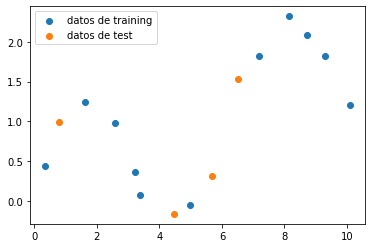

In [ ]:
import numpy as np

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train6, X_test6, y_train6, y_test6 = train_test_split(x, y, random_state=0)

plt.figure()
plt.scatter(X_train6, y_train6, label='datos de training')
plt.scatter(X_test6, y_test6, label='datos de test')
plt.legend(loc=0);

In [ ]:
def polyfeat(n):
    
    polyn = PolynomialFeatures(degree=n)
    X_polyn = polyn.fit_transform(x.reshape(-1, 1))
    
    X_train, X_test, y_train, y_test = train_test_split(X_polyn, y.reshape(-1, 1), random_state = 0)
    
    linregn = LinearRegression().fit(X_train, y_train)
    
    wcoef = linregn.coef_.tolist()
    biast = linregn.intercept_.tolist()
    
    listfp = [x for x in wcoef[0]]
    listfp[0] = biast[0]
    
    return listfp

In [ ]:
def taylor(x, n):
    
    sum1=0
    
    for i in range(len(polyfeat(n))):
        sum1+=polyfeat(n)[i]*pow(x,i)
        
    return sum1

In [ ]:
def poly_9():
    arrayq1 = np.array([[taylor(x,1) for x in np.linspace(0,10,100)],
                        [taylor(x,3) for x in np.linspace(0,10,100)],
                       [taylor(x,6) for x in np.linspace(0,10,100)],
                       [taylor(x,9) for x in np.linspace(0,10,100)]])
    
    return arrayq1

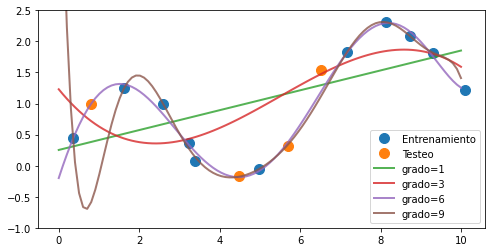

In [ ]:
def grafica(pred):
    
    plt.figure(figsize=(8,4))
    plt.plot(X_train6, y_train6, 'o', label='Entrenamiento', markersize=10)
    plt.plot(X_test6, y_test6, 'o', label='Testeo', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), pred[i], alpha=0.8, lw=2, label='grado={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

grafica(poly_9())

#Regresión Logística

Algoritmo de clasificación

Entrada:

\begin{equation}
\text{input} = b + \sum_{i=1}^{p}\hat{w}_{p}x_{p}
\end{equation}

Regresión aplicada:

\begin{align}
\hat{y} &= \frac{1}{1 + \exp(-\text{input})} \\
&= \frac{1}{1 + \exp\left[-(b + \sum_{i=1}^{p}\hat{w}_{p}x_{p})\right]}
\end{align}

In [ ]:
from sklearn.linear_model import LogisticRegression

import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted']) #admitido = 1.
df

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [ ]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']
#features y variable a clasificar

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)

In [ ]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [ ]:
print('R-2 (entrenamiento): {:.3f}'
     .format(logreg.score(X_train, y_train)))
print('R-2 (testeo): {:.3f}\n'
     .format(logreg.score(X_test, y_test)))

R-2 (entrenamiento): 0.967
R-2 (testeo): 0.800



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score( y_test, y_pred))

0.8


Tomado de https://datatofish.com/logistic-regression-python/

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


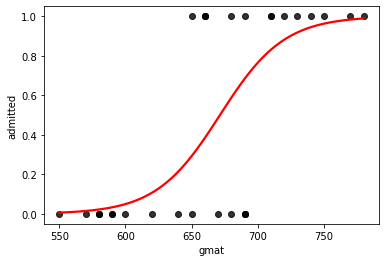

In [ ]:
import seaborn as sns

x = X_train["gmat"]
y = y_train

sns.regplot(x=x, y=y, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


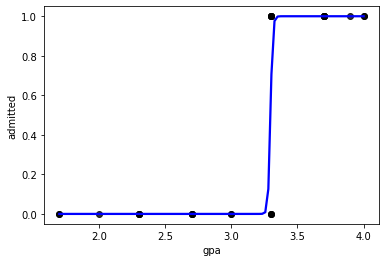

In [ ]:
x = X_train["gpa"]
y = y_train

sns.regplot(x=x, y=y, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'blue'})

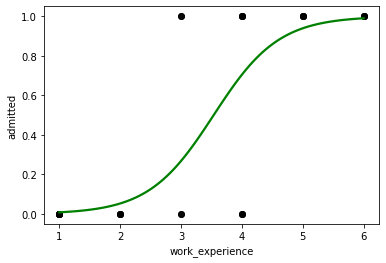

In [ ]:
x = X_train["work_experience"]
y = y_train

sns.regplot(x=x, y=y, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'green'})